In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os
import numpy as np

In [2]:
df = pd.read_csv("results_alitzel_data_experiment1.csv")

In [3]:
df.head()

,Unnamed: 0,fname1,fname2,distance,runtime
0,0,K00362_sankoff.gr,K00362_sankoff.gr,0,0.000350
1,1,K00362_sankoff.gr,K00140_sankoff.gr,7,0.000384
2,2,K00362_sankoff.gr,K00982_sankoff.gr,4,0.000271
3,3,K00362_sankoff.gr,K00262_sankoff.gr,6,0.000277
4,4,K00362_sankoff.gr,K06929_genesis.gr,6,0.000266


In [4]:
chars = set([])
d_fitch_sankoff = {}
d_fitch_genesis = {}
d_genesis_sankoff = {}
for row in df.itertuples():
    char1 = row.fname1.split("_")[0]
    char2 = row.fname2.split("_")[0]
    if char1!=char2:
        continue
    chars.add(char1)
    method1 = row.fname1.split("_")[1].split(".")[0]
    method2 = row.fname2.split("_")[1].split(".")[0]
    if method1=="fitch" and method2=="sankoff":
        d_fitch_sankoff[char1] = int(row.distance)
    if method1=="fitch" and method2=="genesis":
        d_fitch_genesis[char1] = int(row.distance)
    if method1=="genesis" and method2=="sankoff":
        d_genesis_sankoff[char1] = int(row.distance)


        

In [5]:
to_remove = []
for c in chars:
    try:
        d_fitch_genesis[c]
        d_fitch_sankoff[c]
        d_genesis_sankoff[c]
    except KeyError:
        to_remove.append(c)
for c in to_remove:
    chars.remove(c)

In [6]:
N = len(chars)
data = np.zeros((3,N))

In [7]:
keys = sorted(list(chars))
for k, c in enumerate(keys):
    data[0,k] = d_fitch_genesis[c]
    data[1,k] = d_fitch_sankoff[c]
    data[2,k] = d_genesis_sankoff[c]


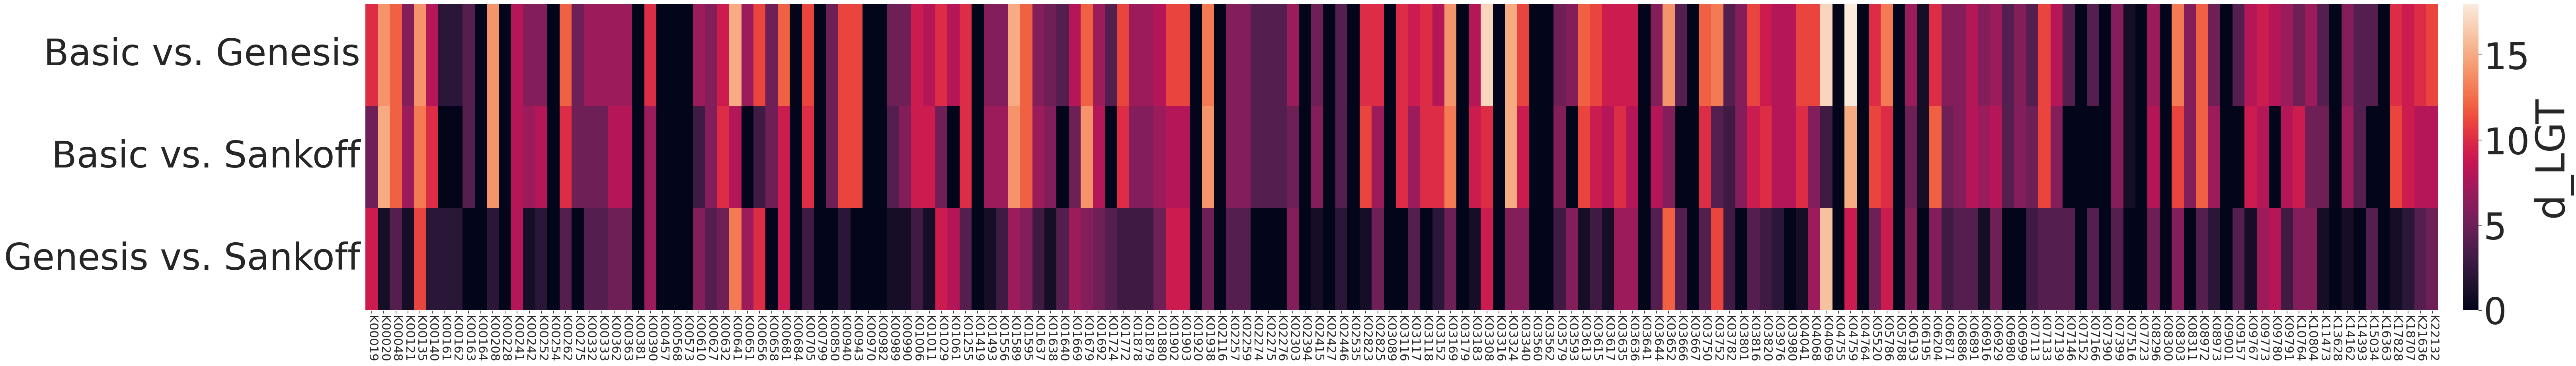

In [27]:
fig,ax = plt.subplots(figsize=(80,10))
sns.set(font_scale=6)
sns.heatmap(data,
            xticklabels=[],
            ax=ax,
            cbar_kws={"label":"d_LGT","pad":0.01},
            yticklabels=["Basic vs. Genesis","Basic vs. Sankoff","Genesis vs. Sankoff"])
sec = ax.secondary_xaxis(location=0)
positions = list(range(len(keys)))
positions = [x+0.5 for x in positions]
sec.set_xticks(positions,labels=keys,fontsize=22,rotation=-90)
fig.savefig("barcode_plot.pdf", bbox_inches = 'tight')
plt.show()